+--------------------+---------+
|               tweet|sentiment|
+--------------------+---------+
|I love working wi...| Positive|
|Big data is overr...| Negative|
|I don't know much...| Positive|
|Big data analytic...|  Neutral|
|Big data is just ...|  Neutral|
|The possibilities...| Negative|
|I think big data ...| Negative|
|I can't stand all...|  Neutral|
|Big data is trans...|  Neutral|
|I'm skeptical abo...| Positive|
+--------------------+---------+

+---------+-----+
|sentiment|count|
+---------+-----+
| Positive|    3|
|  Neutral|    4|
| Negative|    3|
+---------+-----+



<Axes: title={'center': 'Sentiment Distribution'}, xlabel='sentiment'>

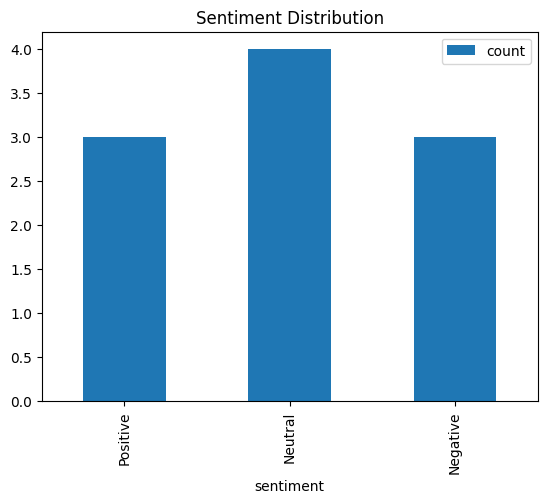

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col
from textblob import TextBlob
from pyspark.sql import functions as F

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("TwitterSentimentAnalysis") \
    .getOrCreate()

# Load data (example CSV containing tweets)
df = spark.read.csv('tweets.csv', header=True, inferSchema=True)

# Define a function to get the sentiment
def get_sentiment(tweet):
    analysis = TextBlob(tweet)
    return 'Positive' if analysis.sentiment.polarity > 0 else 'Negative' if analysis.sentiment.polarity < 0 else 'Neutral'

# Register the function as a UDF
from pyspark.sql.functions import udf
sentiment_udf = udf(get_sentiment)

# Apply the sentiment analysis function to the tweet column
df_with_sentiment = df.withColumn('sentiment', sentiment_udf(col('tweet')))

# Show the result
df_with_sentiment.show()

# Count sentiment distribution
sentiment_counts = df_with_sentiment.groupBy('sentiment').count()
sentiment_counts.show()

# Visualization (using matplotlib)
sentiment_pandas = sentiment_counts.toPandas()
sentiment_pandas.plot(kind='bar', x='sentiment', y='count', title="Sentiment Distribution")


In [3]:
import pandas as pd

# Sample dataset of tweets
data = {
    "tweet": [
        "I love working with big data, it's so exciting!",
        "Big data is overrated and too complicated.",
        "I don't know much about big data but it's a hot topic in tech.",
        "Big data analytics is changing the world of business.",
        "Big data is just another buzzword with no real-world application.",
        "The possibilities with big data are endless!",
        "I think big data could be dangerous if not handled responsibly.",
        "I can't stand all the hype around big data!",
        "Big data is transforming industries globally.",
        "I'm skeptical about how useful big data really is in most cases."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV
df.to_csv("tweets.csv", index=False)

print("tweets.csv file has been created.")


tweets.csv file has been created.
